<h1 align="center">  Algorithmic Information & Artificial Intelligence </h1> 

<h2 align="center"> Micro-study </h2> 


In [484]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation, rc
from IPython.display import HTML
import random as rd
import warnings
import zlib
from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib qt

##### Antoine Boulat étudiant en MS IA - Janvier 2020

### Abstract

Ce projet a été l'occasion pour moi de me pencher sur les phénomènes chaotiques. La théorie du chaos est un pan de la recherche en mathématiques sur l'étude des systèmes dynamiques. 

Dans une première partie, je tenterai de quantifier le caractère aléatoire d'échantillons générés par la suite logistique. Je tenterai ensuite de prédire si un jeu de données a été généré par le système dynamique de l'atmosphère proposé par Edward Lorenz à l'aide des concepts de la théorie algorithmique de l'information. Ce système d'équation différentiel a été proposé par Lorenz lors de sa célèbre conférence de 1972 : "Does the flap of a butterfly’s wings in Brazil set off a tornado in Texas?".

### Problem

Les phénomènes chaotiques sont caractérisés par leur sensibilité aux conditions initiales. Ainsi, JC Maxwell dans Matter and Motion (1876) avait, bien avant Lorenz, eu l'intuition de ce type de phénomène : "il y a une maxime selon laquelle les mêmes causes provoquent les mêmes effets, mais il y a une autre maxime qu'il ne faut pas confondre : des causes semblables produisent des effets semblables. Cela est vrai seulement si de petites variations sur les conditions initiales produisent de petites variations sur l'état final du système. Cela est vrai dans beaucoup de cas, mais il y en a d'autres pour lesquelles une petite variation dans l'état initiale peut produire de grands changements dans l'état final."

Pour étudier ces phénomènes chaotiques, j'ai choisi de me concentrer sur la suite logistique définie par :

$x_{n+1} = \mu x_n (1 - x_n)$ 

avec $x_0 \in [0; 1] $ et $\mu \in [0; 4]$ pour assurer que $x$ reste dans $[0;1]$

Et le système d'équations différentielles de Lorenz (que nous prendrons dans une version discrétisée afin de pouvoir le calculer) :

$ \left\{ \begin{array}{ll}
\frac{dx}{dt} = \sigma [y(t) - x(t)] \\
\frac{dy}{dt} = \rho x(t) - y(t) - x(t) y(t) \\
\frac{dz}{dt} = x(t) y(t) - \beta z(t) 
\end{array} \right. $

nous prendrons $ \sigma = 10$ , $ \rho = 28 $ et $ \beta = \frac{8}{3} $ comme proposé dans la littérature.

Ces équations, pouvant être écrite en quelques lignes de code et donc ayant une faible complexité de Kolmogorov génèrent pourtant des suites au comportement erratique et très sensible aux conditions initiales. 

Mais un système chaotique n'est pourtant pas un système erratique et possède une stabilité structurelle que nous observerons : les attracteurs de Lorenz. Ce sont une des manifestations la plus impressionnante du phénomène de complexité : étant donné une séquence apparaissant aléatoire, mais pouvant pour autant être décrite par uniquement une ligne de code, il n'est pas possible d'obtenir un phénomène extrêmement complexe (dans le sens de la théorie de l'information algorithmique).

### Method

Dans une première partie, je commencerai par afficher des courbes générées à l'aide de la suite logistique pour différentes valeurs de $\mu$. Nous mettrons en évidence la convergence de la suite pour $\mu < 3$ et la convergence vers plusieurs populations pour $\mu \in [3; 3.57]$ qu'importe les conditions initiales. Enfin, nous observerons une augmentation brutale de la complexité apparente à partir de $\mu = 3.57$.

Nous étudierons ce caractère apparemment aléatoire de la suite logistique pour $\mu > 3.57$ avec la fréquence des différents patterns 0, 1, 00, 01... Pour cela, nous prendrons une approximation des nombres pour différentes populations afin de quantifier l'aléatoire.



Dans une seconde partie, nous étudierons le modèle dynamique de Lorenz avec des paramètres $\sigma$, $\rho$ et $\beta$ (respectivement égale à 10, 28 et 8/3) pris dans la littérature afin d'afficher un attracteur. 

Je commencerai par afficher l'attracteur en partant de différents points initiaux choisis de manière aléatoire et je l'enregistrerai dans une vidéo afin de montrer que malgré le caractère sensible aux conditions initiales, une stabilité structurelle se dessine.
Je finirai par coder un prédicteur dans le même principe que ceux de scikit-learn (fit/predict) baser sur la compression afin de vérifier si mon prédicteur est capable de différencier un dataset généré sur le modèle dynamique de Lorenz d'un dataset généré (pseudo) aléatoirement. Pour cela, je trierai les dataset par taux de compression sachant les données d'entrainement (ces données d'entrainement sont générées par le modèle dynamique de Lorenz).

Pour cela, je me suis inspiré du code TextDistance.py du chapitre II qui  permet de quantifier la similarité entre deux langues en fonction de leur compression.

### Results

##### I. Etude de la suite logistique

In [477]:
#implémentation de la suite logistique
def logistic_map(mu, n, x_0):
    x_n = [x_0]
    for k in range(n):
        x_n.append(mu * x_n[k] * (1 - x_n[k]))
    return x_n

In [493]:
#je commence par afficher l'extinction de la population pour différentes conditions initials et pour \mu = 0.75 < 1 
#first_attract : x_0 = 0.25
#second_attract : x_0 = 0.5
first_attract = logistic_map(0.75, 50, 0.25)
second_attract = logistic_map(0.75, 50, 0.5)

In [494]:
plt.figure(1, figsize=(15,15))
plt.xlabel('nième iteration')
plt.ylabel('valeur de la suite logistique')
plt.plot(first_attract)
plt.plot(second_attract)

plt.show()

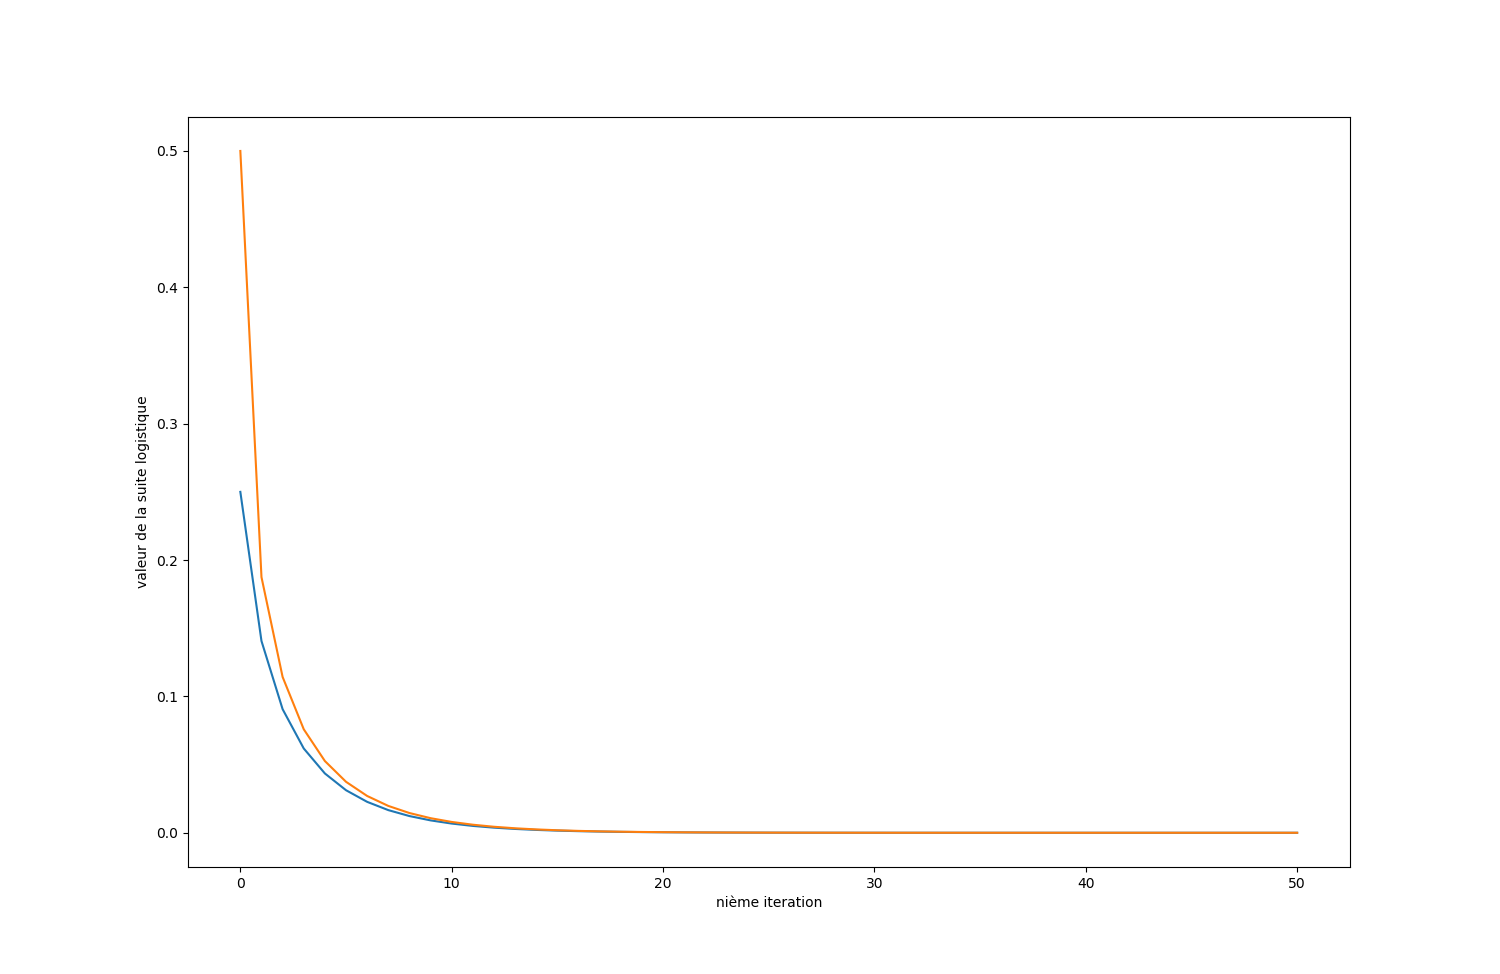

In [495]:
Image(filename='extinction_population.png') 

In [498]:
#ensuite, je montre la convergence de la population pour différentes conditions initials et pour \mu = 2 \in [1; 3] 
#fourth_attract : x_0 = 0.25
#fifth_attract : x_0 = 0.75
fourth_attract = logistic_map(2, 50, 0.25)
fifth_attract = logistic_map(2, 50, 0.75)

In [499]:
plt.figure(1, figsize=(15,15))
plt.xlabel('nième iteration')
plt.ylabel('valeur de la suite logistique')
plt.plot(fourth_attract)
plt.plot(fifth_attract)

plt.show()

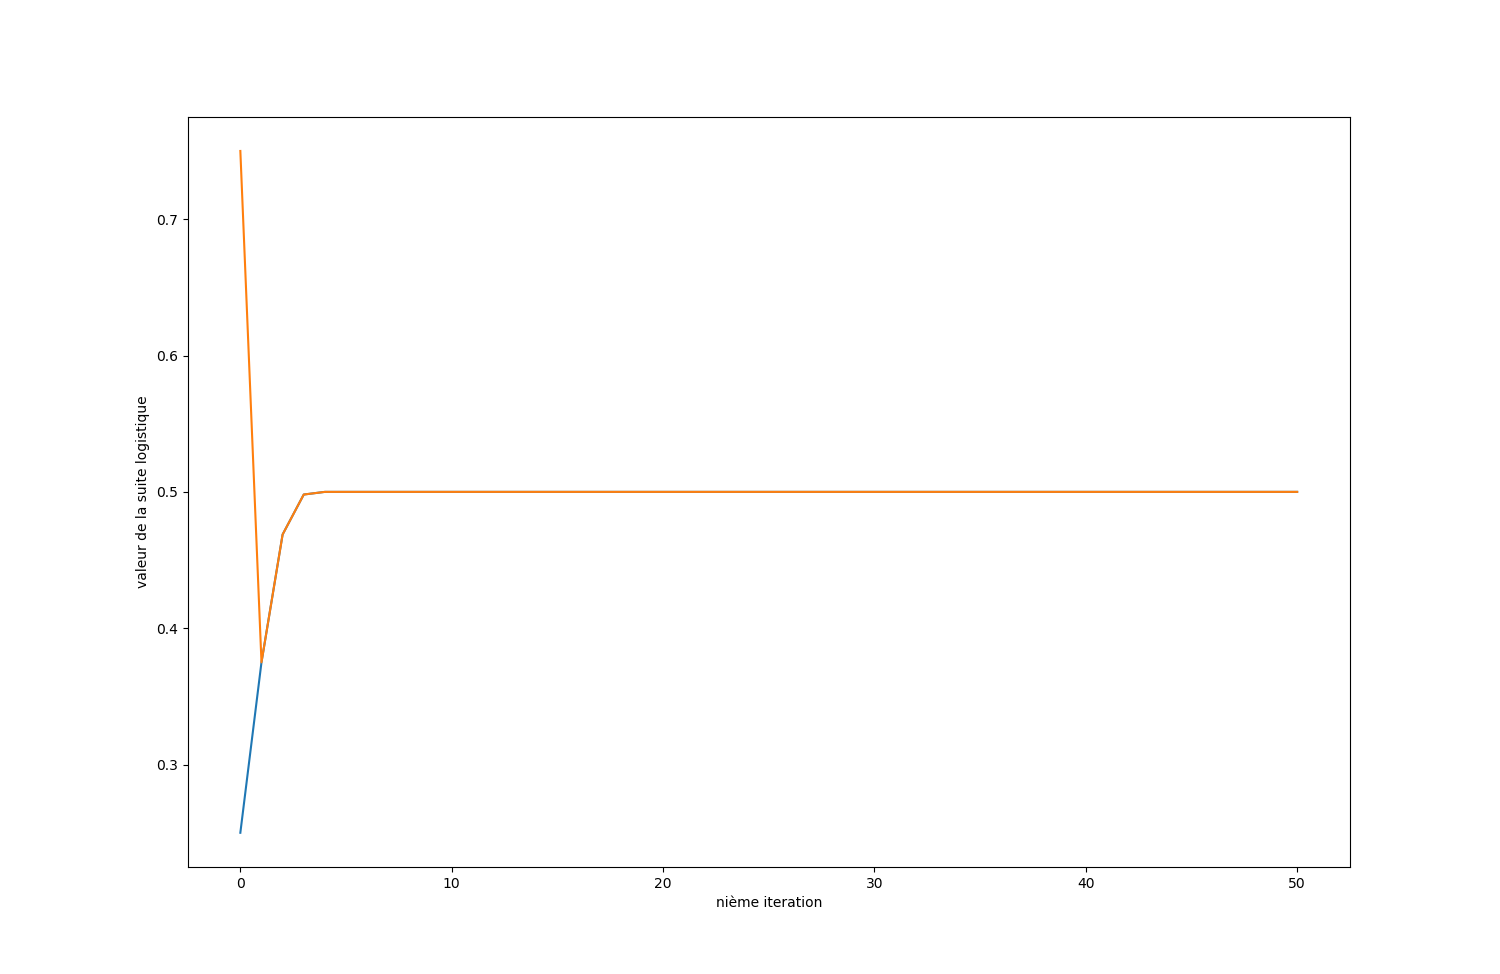

In [500]:
Image(filename='convergence_1population.png') 

In [501]:
#pour \mu = 3.2 \in [3; 3.57] l'effectif de la poulation varie en puissance de deux 
#sixth_attract : x_0 = 0.25
#seventh_attract : x_0 = 0.75
sixth_attract = logistic_map(3.2, 50, 0.25)
seventh_attract = logistic_map(3.2, 50, 0.75)

In [502]:
plt.figure(1, figsize=(15,15))
plt.xlabel('nième iteration')
plt.ylabel('valeur de la suite logistique')
plt.plot(sixth_attract)
plt.plot(seventh_attract)

plt.show()

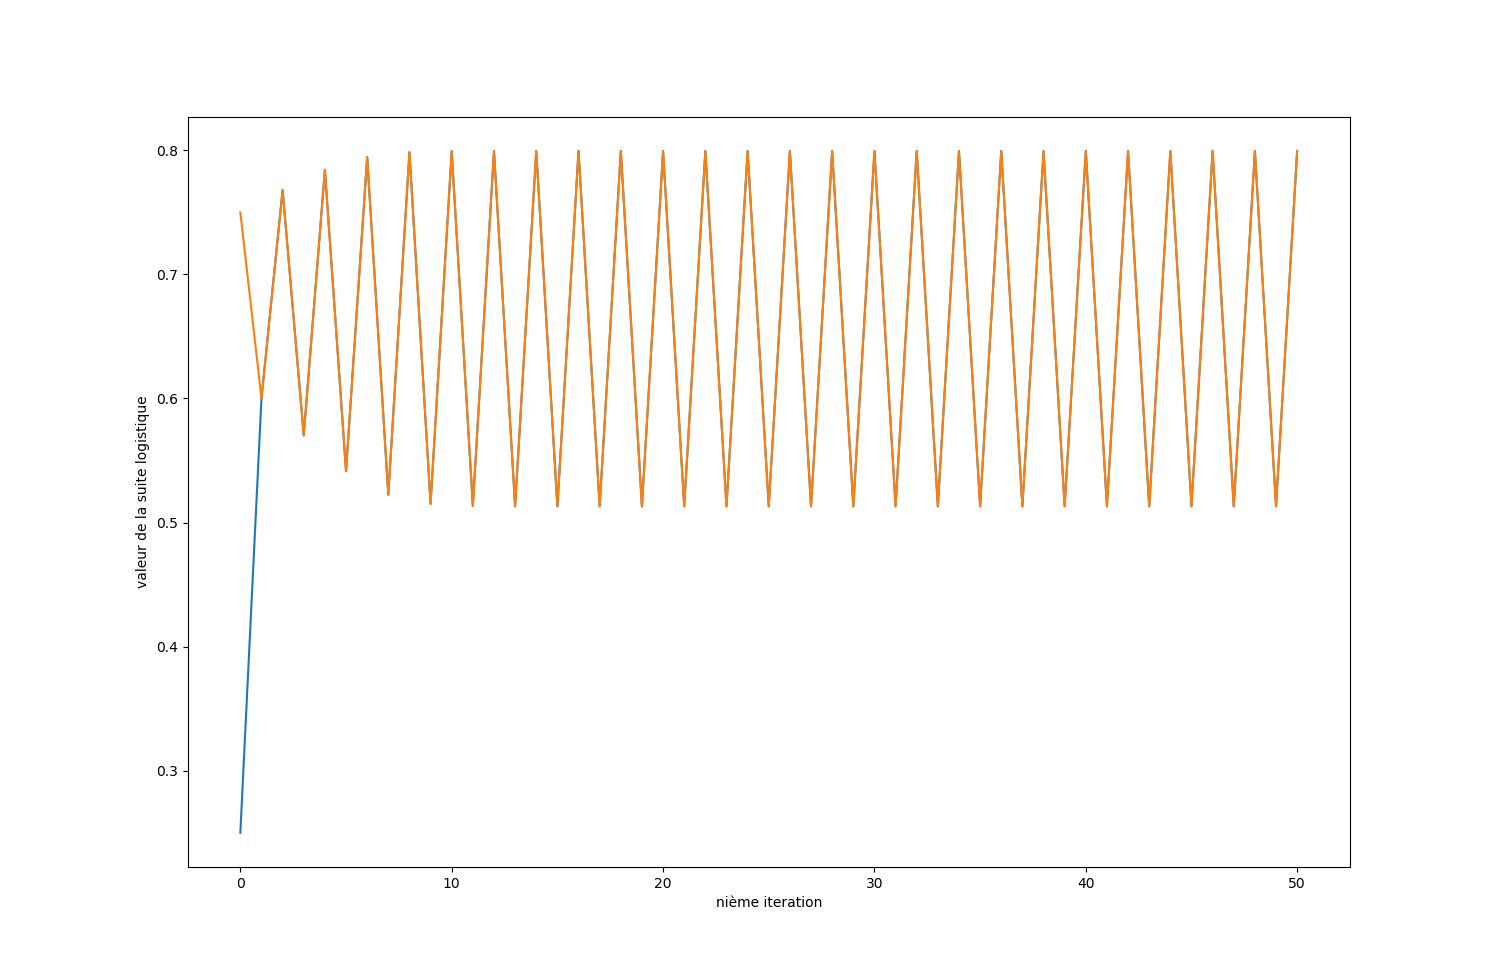

In [503]:
Image(filename='convergence_2power_n_population.png') 

In [504]:
#pour \mu = 3.62 > 3.57 il y a émergence du comportement chaotique 
#eighth_attract : x_0 = 0.25
#nineth_attract : x_0 = 0.75
eighth_attract = logistic_map(3.62, 100, 0.75)
nineth_attract = logistic_map(3.62, 100, 0.7500001)

In [505]:
plt.figure(1, figsize=(15,15))
plt.xlabel('nième iteration')
plt.ylabel('valeur de la suite logistique')
plt.plot(eighth_attract)
plt.plot(nineth_attract)

plt.show()

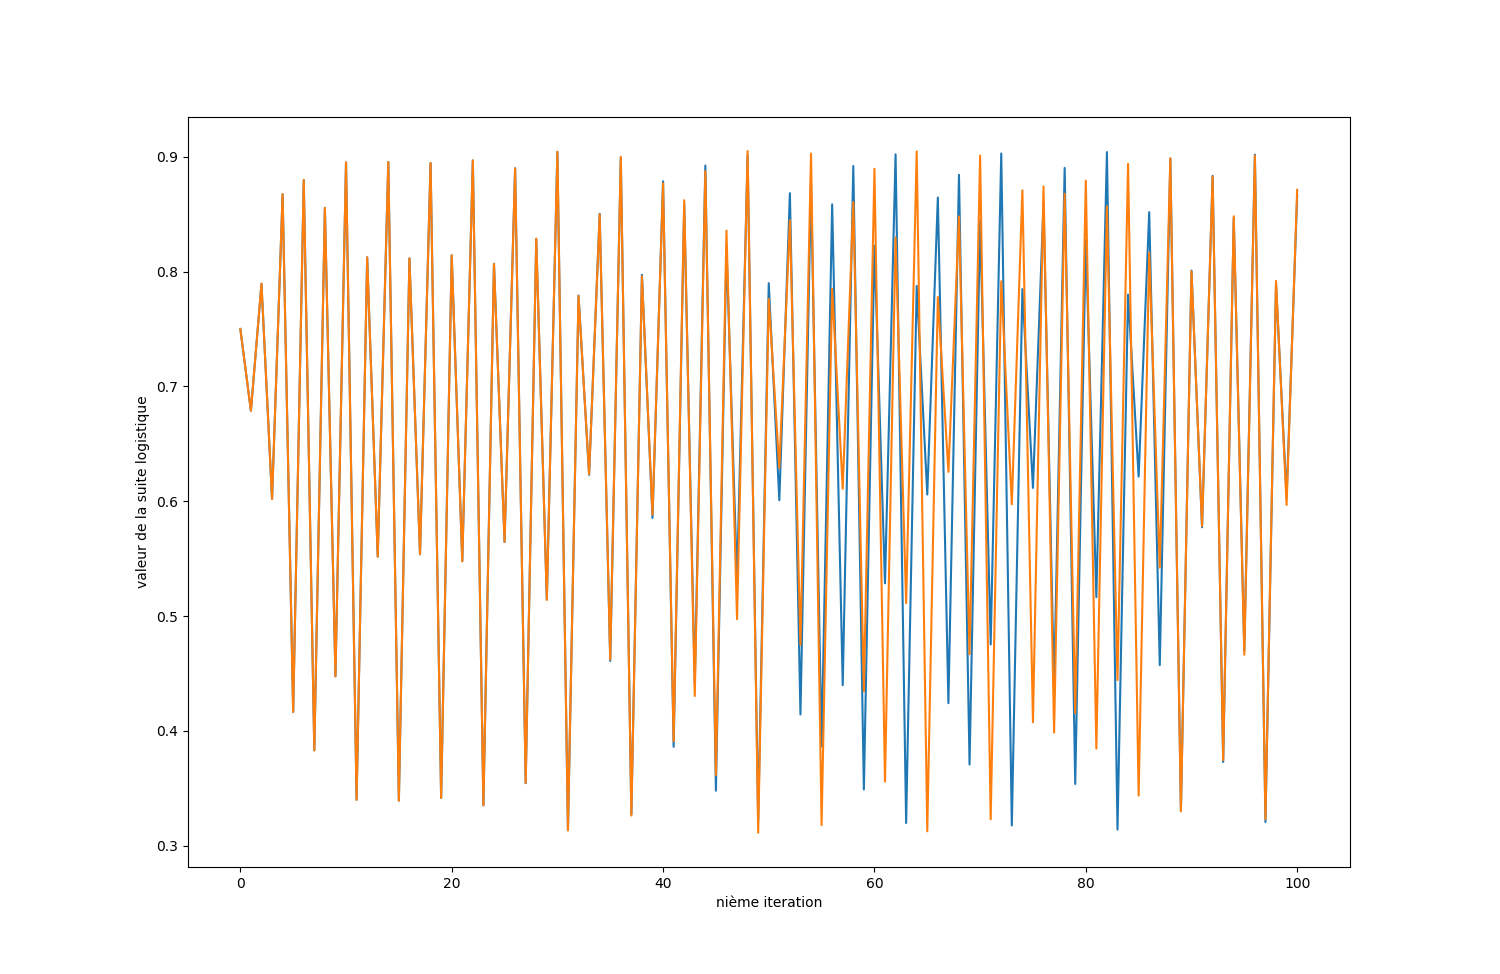

In [506]:
Image(filename='chaotic.png') 

Deux conditions initiales pourtant proches divergent à partir de 50ième itérations.

In [528]:
#je convertis les array en sequence de binaire en multipliant les float compris entre 0 et 1 et en prenant leur parti
#entière. Ca me permettra de les mettres dans le programme RandomByHand afin d'observer la fréquence des 
#différents patterns
def convert_to_bin(array, coeff = 100):
    bin_seq = ''
    array_int = (np.array(array)*coeff).astype(int)
    for coord in array_int:
        bin_seq = bin_seq + bin(coord)[2:]
    return bin_seq

In [552]:
first_attract_bin = convert_to_bin(first_attract)

fourth_attract_bin = convert_to_bin(fourth_attract)

sixth_attract_bin = convert_to_bin(sixth_attract)

eighth_attract_bin = convert_to_bin(eighth_attract)

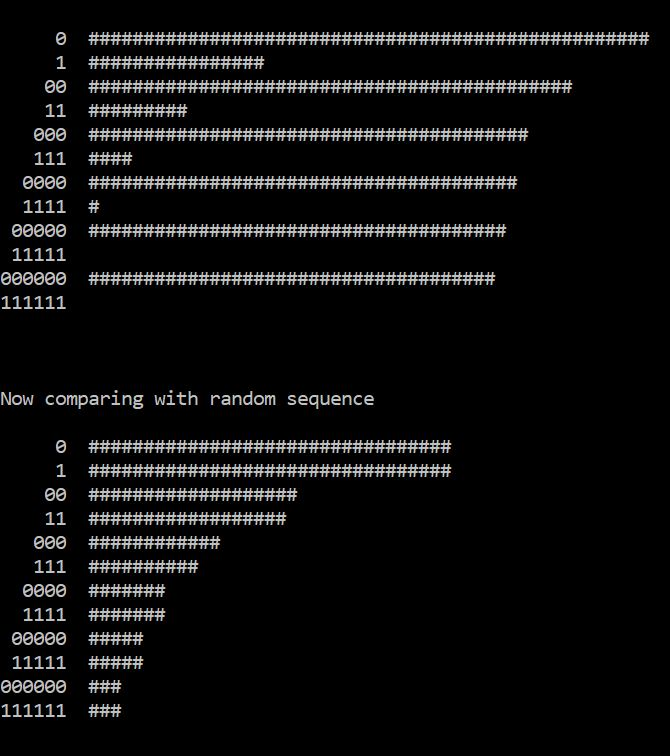

In [553]:
Image(filename='first_seq.jpg') 

Comme nous pouvons le voir ci-dessus, la première séquence (convergeant vers 0) a des fréquences de patterns non caractéristique d'une séquence aléatoire.

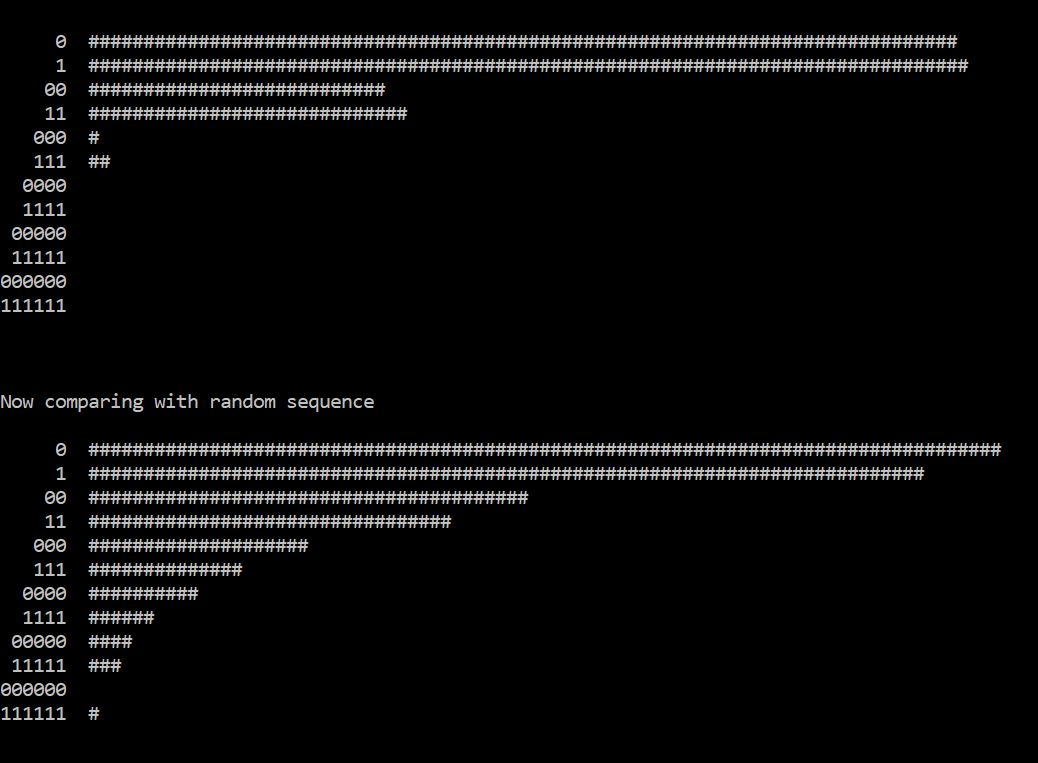

In [554]:
Image(filename='fourth_seq.jpg') 

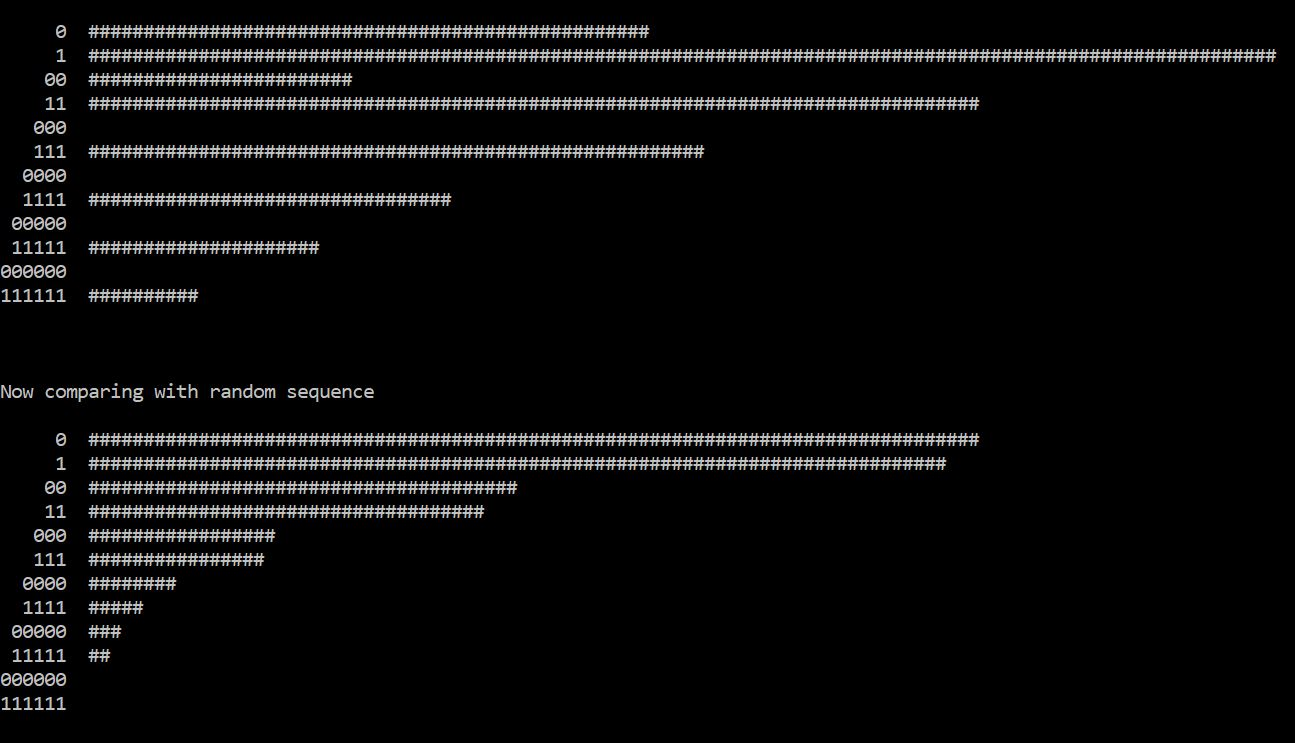

In [555]:
Image(filename='sixth_seq.jpg') 

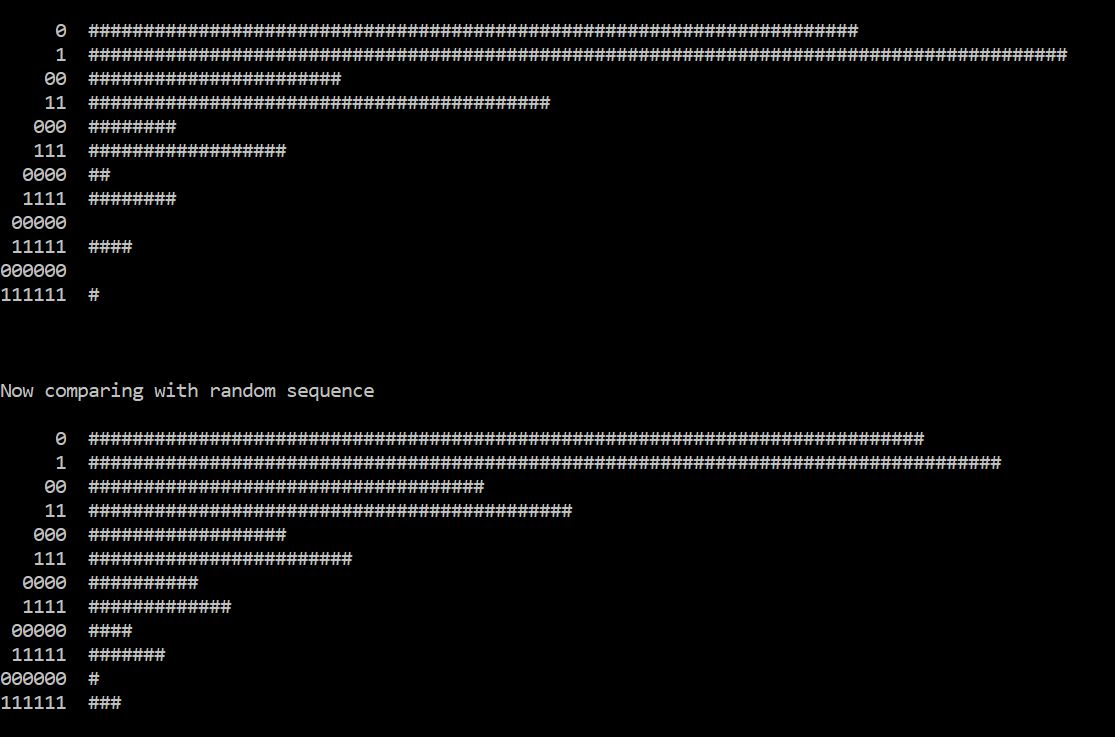

In [556]:
Image(filename='eighth_seq.jpg') 

In [626]:
def compress_binary_sequence(bin_seq):
    CompressedSize = len(zlib.compress(bin_seq.encode("utf-8")))
    #j'ai dû ruser car l'encodage donnait des pourcentages de compression abérants. J'ai donc comparé le 
    #taux de compression de mes séquences binaires à une sequence généré de manière pseudo random
    CompressedSizeRandom = len(zlib.compress(bin(rd.getrandbits(654))[2:].encode("utf-8")))

    CompressingFactor = 100 - 100*CompressedSize/CompressedSizeRandom
    return CompressingFactor

In [627]:
#j'ai dû un peu augmenter le nombre d'iterations afin que chacune des sequences binaires aient à peu près la même longueur
#(environ 600) que la 8ième séquence (celle générée dans une situation chaotique). Indirectement, ma fonction 
#convert_to_bin() compressait la séquence

first_attract = logistic_map(0.75, 635, 0.25)
first_attract_bin = convert_to_bin(first_attract)
fourth_attract = logistic_map(2, 108, 0.25)
fourth_attract_bin = convert_to_bin(fourth_attract)
sixth_attract = logistic_map(3.2, 100, 0.25)
sixth_attract_bin = convert_to_bin(sixth_attract)

In [629]:
print("Pour la suite logistique convergeant vers 0, le taux de compression est de :" + 
      str(compress_binary_sequence(first_attract_bin)) + "%")

print("Pour la suite logistique convergeant vers x appartennant à [0; 1], le taux de compression est de :" + 
      str(compress_binary_sequence(fourth_attract_bin)) + "%")

print("Pour la suite logistique convergeant vers 2 populations, le taux de compression est de :" + 
      str(compress_binary_sequence(sixth_attract_bin)) + "%")

print("Pour la suite logistique prenant des valeurs 'aléatoires' entre 0 et 1 le taux de compression est de :" + 
      str(compress_binary_sequence(eighth_attract_bin)) + "%")

Pour la suite logistique convergeant vers 0, le taux de compression est de :83.55263157894737%
Pour la suite logistique convergeant vers x appartennant à [0; 1], le taux de compression est de :78.91156462585033%
Pour la suite logistique convergeant vers 2 populations, le taux de compression est de :74.46808510638297%
Pour la suite logistique prenant des valeurs 'aléatoires' entre 0 et 1 le taux de compression est de :21.23287671232876%


Si les taux de compression sont aussi importants même pour la suite erratique, on peut néanmoins bien observer que les taux de compression sont cohérents vis-à-vis de la manière dont elles ont été généré. Le taux de compression de la série généré par la suite logistique avec $\mu > 3.57$ est néanmoins assez élevé (beaucoup plus que pour un nombre généré aléatoirement). Il est donc difficile d'affirmer que ce nombre est aléatoire.

##### II. Etude du modèle dynamique de Lorenz

In [306]:
#implémentation du systeme différentiel de Lorenz

def dynamic_lorenz(etat_n, t, rho = 28.0, sig = 10.0, beta = 2.6):
    x, y, z = etat_n
    return sig * (y - x), x * (rho - z) - y, x * y - beta * z

In [307]:
#pour le fichier vidéo en dessous, j'ai pris N_etat_initial = 10 afin que ce soit plus lisible. Si j'ai généré autant
#d'états initiaux, ce sera pour la suite du rapport afin d'avoir une solide base de données initial pour l'entrainement et
#le test de mon modèle
N_etat_initial = 1000

#les différents états initiaux sont généré aléatoirement 
etat_initial = -5 + 10 * np.random.random((N_etat_initial, 3))
t = np.arange(0, 10, 0.01)

integral = np.asarray([odeint(dynamic_lorenz, x0, t) for x0 in etat_initial])


In [208]:
#ce code permet de faire une animation 3D de notre attracteur
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

colors = plt.cm.jet(np.linspace(0, 1, N_etat_initial))

lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

ax.view_init(30, 0)

def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

def animate(i):
    i = (2 * i) % integral.shape[1]

    for line, pt, xi in zip(lines, pts, integral):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=30, blit=True, repeat=False)

plt.show()

In [10]:
#on enregistre la vidéo à l'aide de la librairie IPython.display 
HTML(anim.to_html5_video())

In [404]:
#modèle permettant de prédire les échantillons générés par le système dynamique de Lorenz
class CompressionKolmogorov():
    
    #mon modèle n'est pas parfait, il faut spécifier combien d'échantillons sont générés à l'aide du système différentiel
    def __init__(self, n_generate_lorenz):
        self.n_generate_lorenz = n_generate_lorenz
    
    #permet d'obtenir l'accuracy du modèle
    def score(self, Ypredict, Ytest):
        score = 0
        for k in range(len(Ypredict)):
            if Ypredict[k] == Ytest[k]:
                score +=1
        score /= len(Ytest)
        return score   
    
    def fit(self, Xtrain, Ytrain):
        bytes_reference = Xtrain.tobytes()
        
        self.Xtrain = bytes_reference
        self.Ytrain = Ytrain
        return self
    
    def predict(self, Xtest):
        Ypredict = []
        X_compressed_size = []
        for x_to_classify in Xtest:
            bytes_array_toclassify = x_to_classify.tobytes()
            bytes_total = self.Xtrain + bytes_array_toclassify
            bytes_compressed = zlib.compress(bytes_total)
            X_compressed_size.append(len(bytes_compressed)/len(bytes_total))
        X_compressed_size = np.array(X_compressed_size)
        predict_lorenz = np.argsort(X_compressed_size)[:self.n_generate_lorenz]
        for k in range(len(Xtest)):
            if k in predict_lorenz:
                Ypredict.append(1)
            else:
                Ypredict.append(0)
        return Ypredict

In [446]:
#nombre d'échantillons d'entrainement et de test
n_train = 500
n_test = 400

In [447]:
#tirage sans remise pour les indices d'entrainement et de test du modèle
random_index = np.random.choice(np.arange(len(integral) - 1), 900, replace = False)
random_index_train = random_index[:n_train]
random_index_test = random_index[n_train:n_train + n_test]

#pour comparer notre prédicteur, on génère des échantillons aléatoires suivant une distribution uniforme
#entre le minimum et le maximum du dataset généré à l'aide du système dynamique de Lorenz
random_uniform = np.random.uniform(np.min(integral), np.max(integral), (integral[[random_index_test]].shape))

Xtrain = integral[[random_index_train]]
Xtest = np.concatenate((integral[[random_index_test]], random_uniform))
Ytrain = [1]
Ytest = []
for k in range(2*n_test):
    if k<n_test:
        Ytest.append(1)
    else:
        Ytest.append(0)

In [448]:
model = CompressionKolmogorov(n_test).fit(Xtrain, Ytrain)
model

In [449]:
Ypredict = model.predict(Xtest)

In [450]:
model.score(Ypredict, Ytest)

0.9

Nous obtenons un bon taux de prédiction !

### Discussion

##### I. Etude de la suite logistique 

J'ai utilisé le script python du chapitre III RandomByHand.py permettant de calculer la fréquence des patterns dans une suite de bits. Néanmoins, et comme nous l'avons vu dans le chapitre III, la distribution des fréquences ne peut pas assurer du caractère aléatoire d'un nombre. En effet, il existe un nombre respectant cette distribution de fréquence mais qui ne peut être considéré comme aléatoire : la constante de Champernowne (environ 0.12345678910...). Cependant, la distribution des fréquences nous indique si une séquence ne peut pas être considérée comme aléatoire (c'est le cas lorsque $\mu < 3.57$.

De plus, comme nous l'avons vu dans le chapitre III, la génération d'un nombre pseudo-aléatoire n'est pas aléatoire : à partir du moment où on a un algorithme, soit une suite d'instructions pour le générer, il ne peut plus être considéré comme aléatoire. Il existe bien un nombre aléatoire $\Omega$, mais ce dernier n'est pas calculable.

Les programmes de compression sont seulement capables de détecter les répétitions de patterns. Ils sont donc capables de donner une borne supérieure de la complexité de Kolmogorov. Un programme de compression parfait serait capable de trouver, à partir d'une séquence de nombres, l'algorithme ayant permis de générer cette séquence. Par exemple, en donnant la séquence générée par le système d'équations de Lorenz, cet algorithme (non computable) nous renverrait le système d'équations différentiel. Les compresseurs ont donc des limites pour mesurer les redondances d'une séquence.


##### II. Etude du modèle dynamique de Lorenz

Si j'ai choisi de traiter ce sujet, c'est qu'il est aujourd'hui connu de tous, en particulier à travers l'expression "Un battement d'ailes d'un papillon au Brésil peut générer une tempête au texas". Rares sont les thèmes des mathématiques qui arrivent à l'oreille du grand public mais c'est le cas pour le phénomène du chaos et plusieurs films ont été réalisés sur ce thème : Le Battement d'Ailes du Papillon de Laurent Firode ou encore The Butterfly Effect d'Eric Bress. 
Mais il reste néanmoins très mal compris. En effet, même si une petite fluctuation de pression dans l'atmosphère due au battement d'ailes d'un papillon peut générer un ouragan au Texas, l'inverse est tout à fait possible. Et en définitive le plus important n'est pas qu'il l'empêche ou qu'il le génère, cet événement aura de toute façon lieu à un moment ou à un autre et avec une fréquence constante sur des temps longs.


J'ai aussi traité ce sujet car malgré l'apparente complexité des séquences générées par le système d'équations différentiel, une élégante simplicité semble se dessiner à travers les attracteurs de Lorenz. Il me semblait donc bien en adéquation avec les thèmes de ce cours.

On a ainsi pu mettre en évidence qu'en compressant (avec perte) une séquence de float généré par le système de Lorenz, il est possible de prédire si une autre séquence, a priori erratique, a été généré par le même système d'équations. Cela est dû au fait que les valeurs se distribuent sur un attracteur, une figure fractale (il ne s'agit pas d'une surface, mais bien d'une fractale, donc une figure géométrique entre la surface et le volume). 

### Conclusion :

J'aurais souhaité avoir plus de temps à investir dans ce projet, je suis conscient qu'il est loin d'être parfait, en particulier pour la classe de prédicteur que j'ai créée où je suis obligé de spécifier le nombre d'échantillons générés par le système d'équations de Lorenz. J'ai aussi eu des difficultés à concilier le caractère continu des phénomènes et l'obtention de nombre sous forme de flottants. Dans le cours, il était questions de séquences binaires, il était donc plus simple de les traiter sous l'angle de l'AIT.

Je pense néanmoins avoir obtenu quelques résultats intéressants. J'étais très enthousiaste quand j'ai obtenu une bonne accuracy sur un nombre d'échantillons important. Si j'avais eu plus de temps, je me serais penché sur les différentes bibliothèques de compressions de Python afin de choisir celle qui obtient les meilleurs résultats. J'aurais aussi souhaité investiguer plus les différents types d'encodage.

Finalement, j'ai passé du temps à comprendre le sujet et à lire des articles scientifiques sur différents types de mesure permettant de détecter les phénomènes chaotiques à l'aide d'invariants (en particulier la mesure de  Sinai-Ruelle-Bowen) mais je n'ai pas eu le temps de l'implémenter. 

J'ai aussi hésité à calculer l'entropie de mes dataset "chaotiques", mais j'avais peur de sortir du sujet de la théorie algorithmique de l'information.

### Bibliography

Film d'Aurelien Alvarez : www.chaos-math.org

Vidéo de science etonnante sur la théorie du chaos : https://www.youtube.com/watch?v=YrOyRCD7M14&t=31s

Suite logistique : https://en.wikipedia.org/wiki/Logistic_map

Attracteur de Lorenz : https://en.wikipedia.org/wiki/Lorenz_system

Novel measures based on the Kolmogorov complexity for use in complex system behavior studies and time series analysis : http://scholar.google.fr/scholar_url?url=https://www.degruyter.com/downloadpdf/journals/phys/13/1/article-phys-2015-0001.pdf.pdf&hl=fr&sa=X&ei=cvQEYMOuPJXKmAGvxJzwCg&scisig=AAGBfm2mWKiEjPhj9CvHvOG4aL20VKZKMg&nossl=1&oi=scholarr

Kolmogorov complexity and chaotic phenomena Vladik Kreinovitch and Isaac A Kunin : https://scholarworks.utep.edu/cgi/viewcontent.cgi?article=1350&context=cs_techrep